# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up url
base_url="http://api.openweathermap.org/data/2.5/weather?"
Fahrenheit="&units=imperial"

# Define lists
max_temp=[]
latitude=[]
longitude=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
cities_found=[]
dates=[]
numbercount=0
setcount=1

# Start print title
print("Beginning Data Retrieval")
print("-----------------------------")

# Start a loop to go over all cities in the "cities" list.
for city in cities:
    url=base_url+"&q="+city+"&appid="+weather_api_key+Fahrenheit
    response=requests.get(url)
    if (not response):
        print("City not found. Skipping...")
    else:
        weather=response.json()
        cities_found.append(city)
        max_temp.append(weather["main"]["temp_max"])
        latitude.append(weather["coord"]["lat"])
        longitude.append(weather["coord"]["lon"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        windspeed.append(weather["wind"]["speed"])
        country.append(weather["sys"]["country"])
        dates.append(weather["dt"])
        if numbercount==50:
            numbercount=0
            setcount+=1
        numbercount+=1
        print(f"Processing Record {numbercount} of Set {setcount} | {city}")
    time.sleep(1)

# Print the endings
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port-gentil
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | vardenis
Processing Record 6 of Set 1 | salinopolis
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | chumikan
Processing Record 11 of Set 1 | tornio
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | chany
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | lumberton
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | mitsamiouli
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | auki
City not found. Skipping...
Processing Record 21 of Set 1 | wattegama
Processing Record 22 of Set 

Processing Record 34 of Set 4 | vilya
Processing Record 35 of Set 4 | bambous virieux
Processing Record 36 of Set 4 | bima
Processing Record 37 of Set 4 | nishihara
Processing Record 38 of Set 4 | cartagena
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | carutapera
Processing Record 41 of Set 4 | chipiona
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | verkhoyansk
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | tabuk
Processing Record 46 of Set 4 | olga
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | dallas
Processing Record 49 of Set 4 | bundaberg
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of Set 4 | uberaba
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | lubumbashi
Processing Record 3 of Set 5 | kalmar
Processing Record 4 of Set 5 | sovetskaya gavan
Processing Record 5 of Set 5 | eydhafushi
Processing Record 6 of Set 5 | majene
Processi

Processing Record 28 of Set 8 | mount pleasant
Processing Record 29 of Set 8 | batemans bay
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | hearst
Processing Record 32 of Set 8 | koungou
Processing Record 33 of Set 8 | iquique
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | vigeland
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | inta
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | mokhsogollokh
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | mackay
Processing Record 43 of Set 8 | pozoblanco
Processing Record 44 of Set 8 | sevojno
City not found. Skipping...
Processing Record 45 of Set 8 | masallatah
Processing Record 46 of Set 8 | port moresby
Processing Record 47 of Set 8 | sibu
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 8 | sumbe
Processing Record 49 of Set 8 | hirara
Processing R

Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(f"City          {len(cities_found)}")
print(f"Lat           {len(latitude)}")
print(f"Lng           {len(longitude)}")
print(f"Max Temp      {len(max_temp)}")
print(f"Humidity      {len(humidity)}")
print(f"Cloudiness    {len(cloudiness)}")
print(f"Wind Speed    {len(windspeed)}")
print(f"Country       {len(country)}")
print(f"Date          {len(dates)}")

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562


In [23]:
df=pd.DataFrame({"City":cities_found,"Lat":latitude,"Lng":longitude,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":windspeed,"Country":country,"Date":dates})
df.to_csv("Data Output/City Data.csv",index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,33.80,86,40,1.45,AR,1592843768
1,port-gentil,-0.72,8.78,78.80,78,90,9.17,GA,1592843718
2,rikitea,-23.12,-134.97,69.60,61,89,15.97,PF,1592843932
3,yellowknife,62.46,-114.35,71.01,63,75,5.82,CA,1592843933
4,vardenis,40.18,45.73,53.13,71,25,4.27,AM,1592843934


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
selected_df=df.loc[df["Humidity"]<=100,:]
selected_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.226993,15.967384,71.134484,67.161922,47.163701,8.089057,1.592844e+09
std,32.769335,89.334178,14.873480,21.322256,36.817973,5.387071,1.997340e+02
min,-54.800000,-179.170000,32.700000,3.000000,0.000000,0.090000,1.592844e+09
25%,-6.382500,-62.405000,60.040000,56.000000,9.250000,4.000000,1.592844e+09
50%,24.850000,18.435000,73.075000,71.000000,40.000000,6.930000,1.592844e+09
75%,47.580000,89.937500,82.000000,83.000000,86.000000,10.627500,1.592844e+09
max,78.220000,179.320000,115.570000,100.000000,100.000000,31.090000,1.592845e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
selected2_df=df.loc[df["Humidity"]>100,:]
selected2_df["City"]

Series([], Name: City, dtype: object)

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity_quartiles=df["Humidity"].quantile([0.25,0.5,0.75])
humidity_iqr=humidity_quartiles[0.75]-humidity_quartiles[0.25]
humidity_LB=humidity_quartiles[0.25]-1.5*humidity_iqr
humidity_UB=humidity_quartiles[0.75]+1.5*humidity_iqr
outlier_data=df.loc[(df["Humidity"]<humidity_LB)|(df["Humidity"]>humidity_UB),:]
clean_city_data=df.loc[(df["Humidity"]>humidity_LB)&(df["Humidity"]<humidity_UB),:]
outlier_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
30,agadez,19.75,10.25,102.13,7,0,3.04,NE,1592843966
88,kolokani,13.57,-8.03,105.26,13,40,9.04,ML,1592843897
118,aksu,41.12,80.26,82.62,14,24,8.50,CN,1592844076
169,adrar,20.50,-10.07,111.81,6,0,18.92,MR,1592844138
211,taoudenni,22.68,-3.98,115.57,5,14,16.89,ML,1592844189
225,tessalit,20.20,1.01,108.30,6,1,6.96,ML,1592844204
242,aswan,24.09,32.91,102.24,8,0,15.14,EG,1592844226
287,kaeo,-35.10,173.78,60.01,3,50,8.99,NZ,1592844278
309,saint george,37.10,-113.58,91.99,14,1,5.82,US,1592844303
325,kashi,39.45,75.98,82.40,15,17,6.71,CN,1592844321


In [24]:
# Extract relevant fields from the data frame
outlier_data.to_csv("Data Output/Humidity Outliers Data.csv",index=False)

# Export the City_Data into a csv
clean_city_data.to_csv("Data Output/Clean City Data.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

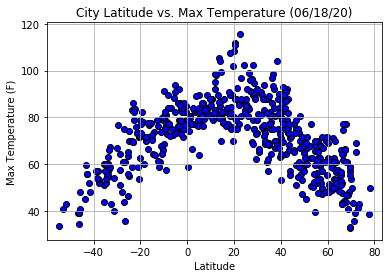

In [25]:
x=latitude
y=max_temp
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(latitude)-5,max(latitude)+5)
plt.ylim(min(max_temp)-5,max(max_temp)+5)
plt.grid()
plt.savefig("Image Output/City Latitude vs Max Temperature.png")
plt.show()

In [14]:
# Observation: The max temperatures of cities reach the highest value when latitude equals 20.

## Latitude vs. Humidity Plot

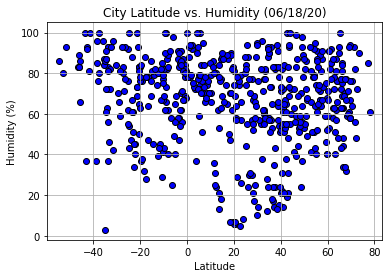

In [26]:
x=latitude
y=humidity
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(latitude)-5,max(latitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.grid()
plt.savefig("Image Output/City Latitude vs Humidity.png")
plt.show()

In [ ]:
# Observation: The humidity of city has no obvious correlation with latitude.

## Latitude vs. Cloudiness Plot

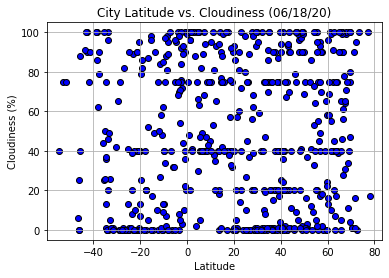

In [27]:
x=latitude
y=cloudiness
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(latitude)-5,max(latitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.grid()
plt.savefig("Image Output/City Latitude vs Cloudiness.png")
plt.show()

In [ ]:
# Observation: The cloudiness of city has no obvious correlation with latitude.

## Latitude vs. Wind Speed Plot

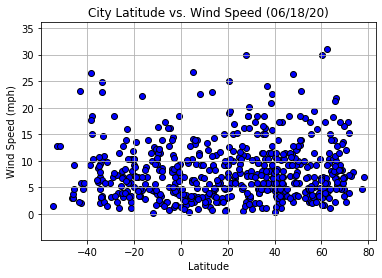

In [28]:
x=latitude
y=windspeed
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(latitude)-5,max(latitude)+5)
plt.ylim(min(windspeed)-5,max(windspeed)+5)
plt.grid()
plt.savefig("Image Output/City Latitude vs Wind Speed.png")
plt.show()

In [ ]:
# Observation: The wind speed of city has no obvious correlation with latitude, most cities are below 20 mph wind speed.

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
    regress_values=slope*x+intercept
    linear_equation=f"y={round(slope,2)}x+{round(intercept,2)}"
    print(f"The r-squared is: {rvalue**2}")
    print(f"The linear equation is: {linear_equation}.")
    plt.scatter(x,y,marker="o",facecolors="blue")
    plt.plot(x,regress_values,"-r")
    plt.annotate(linear_equation,(min(x)+10,min(y)+20),fontsize=15,color="red")
    plt.xlim(min(x)-5,max(x)+5)
    plt.ylim(min(y)-5,max(y)+5)

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=df.loc[df["Lat"]>=0,:]
southern_df=df.loc[df["Lat"]<0,:]
northern_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,yellowknife,62.46,-114.35,71.01,63,75,5.82,CA,1592843933


In [31]:
southern_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8,-68.3,33.8,86,40,1.45,AR,1592843768


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5055872514613976
The linear equation is: y=-0.54x+93.3.


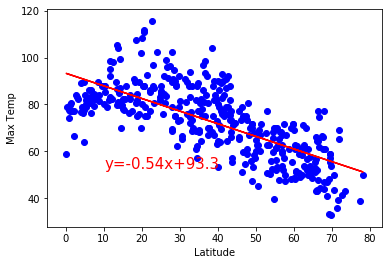

In [34]:
x_axis=northern_df["Lat"]
y_axis=northern_df["Max Temp"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Image Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For northern hemisphere, the max temperature of a city has strong negative correlation with the city latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6567720948319693
The linear equation is: y=0.8x+83.99.


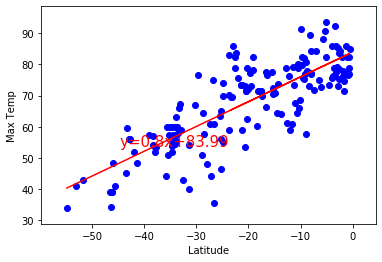

In [35]:
x_axis=southern_df["Lat"]
y_axis=southern_df["Max Temp"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Image Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For southern hemisphere, the max temperature of a city has strong positive correlation with the city latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.5696045588270739e-06
The linear equation is: y=0.0x+65.01.


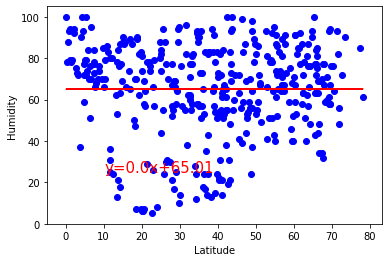

In [36]:
x_axis=northern_df["Lat"]
y_axis=northern_df["Humidity"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Image Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For northern hemisphere, the humidity of a city has no correlation with the city latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021935116426052646
The linear equation is: y=-0.21x+67.68.


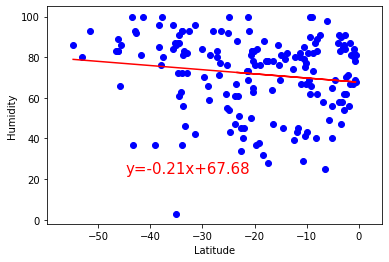

In [37]:
x_axis=southern_df["Lat"]
y_axis=southern_df["Humidity"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Image Output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For southern hemisphere, the humidity of a city has very weak negative correlation with the city latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006343720285421176
The linear equation is: y=-0.05x+50.54.


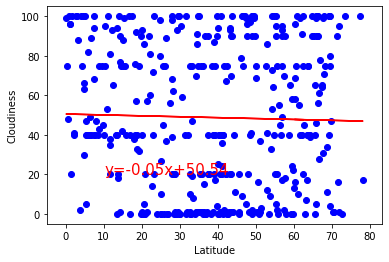

In [38]:
x_axis=northern_df["Lat"]
y_axis=northern_df["Cloudiness"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Image Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For northern hemisphere, the cloudiness of a city has no correlation with the city latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004701179424379574
The linear equation is: y=0.19x+47.35.


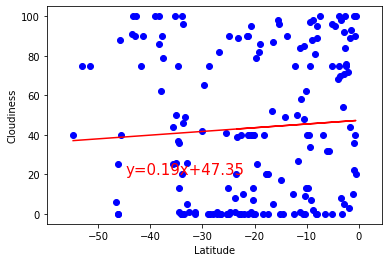

In [39]:
x_axis=southern_df["Lat"]
y_axis=southern_df["Cloudiness"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Image Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For southern hemisphere, the cloudiness of a city has no correlation with the city latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005303473381197269
The linear equation is: y=0.02x+7.44.


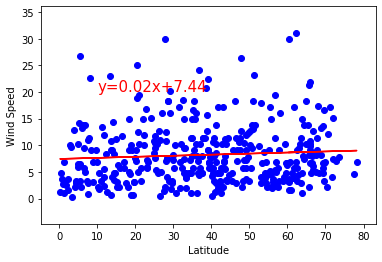

In [40]:
x_axis=northern_df["Lat"]
y_axis=northern_df["Wind Speed"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Image Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For northern hemisphere, the wind speed of a city has no correlation with the city latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0018555083518085268
The linear equation is: y=-0.02x+7.51.


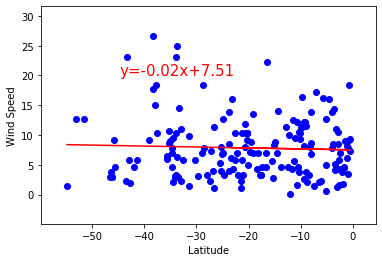

In [41]:
x_axis=southern_df["Lat"]
y_axis=southern_df["Wind Speed"]
linear_regression(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Image Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observation: For southern hemisphere, the wind speed of a city has no correlation with the city latitude.